# pip & import

In [1]:
# pip보다 작업을 더욱 쉽게 만들어줌
!pip install micropip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.4 MB/s eta 0:00:00


In [2]:
# Matplotlib 기반, 벤 다이어그램을 그리는 데 사용
# 집합, 그룹 간의 관계를 시각화
!pip install matplotlib-venn

In [3]:
import micropip
await micropip.install("seaborn")

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 시각화 폰트를 적용

fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

In [5]:
import os # 시스템
import random # 난수생성
import numpy as np # 행렬연산
import pandas as pd # 데이터 분석

In [6]:
# matplotlib 캐시 삭제
!rm -rf ~/.cache/matplotlib

In [7]:
# font 다운로드
!sudo apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,622 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and dire

In [8]:
# 글꼴 캐시 업데이트 및 추가
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [10]:
plt.rc('font', family='NanumBarunGothic')
# 한글 폰트 사용 시 마이너스 폰트 깨짐 방지
plt.rc('axes', unicode_minus=False)

# seed 고정 & 함수정의

In [11]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

# Data Load

In [12]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount("/content/data")

Mounted at /content/data


In [13]:
# 딕셔너리를 간편하게 사용하는 것을 도와준다. 모델 class 처럼 사용 가능
# dot을 이용해 객체를 불러 사용. JSON 다룰때 유용.
import easydict
args = easydict.EasyDict()

# path
args.default_path = "/content/data/MyDrive/Playdata/Competitions/ML/DG/Data/" # 메인 경로
args.train_path = args.default_path + "train.csv" # train 데이터 경로
args.test_path = args.default_path + "test.csv" # train 데이터 경로

args.default_submission_path = args.default_path + "sample_submission.csv" # 예측결과(제출파일) 경로
args.result_path = "/content/data/MyDrive/Playdata/Competitions/ML/DG/Result/"

# 데이터 분석을 위한 변수들
# 난수 생성 제어 => 같은 코드를 실행해도 동일한 결과를 얻기 위해서 설정
# 데이터 분할 및 모델 초기화 때 유용.
args.random_state = 42
args.results = [] # 결과 저장 리스트

In [14]:
# Data를 불러와 DataFrame화
train_org = pd.read_csv(args.train_path)
test_org = pd.read_csv(args.test_path)

In [15]:
# 원본데이터 보존을 위해 복사를 해서 분석에 사용
train_df = train_org.copy()
test_df = test_org.copy()

In [16]:
# 대구광역시 중구 대신동 => 대구광역시 / 중구 / 대신동 => 각 컬럼 생성
train_df['시'] = train_df['시군구'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else '')
train_df['군'] = train_df['시군구'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else '')
train_df['구'] = train_df['시군구'].apply(lambda x: x.split()[2] if len(x.split()) > 2 else '')

In [17]:
a = train_df['시군구'].head(1)
b = train_df['시'].head(1)
c = train_df['군'].head(1)
d = train_df['구'].head(1)

a, b, c, d

(0    대구광역시 중구 대신동
 Name: 시군구, dtype: object,
 0    대구광역시
 Name: 시, dtype: object,
 0    중구
 Name: 군, dtype: object,
 0    대신동
 Name: 구, dtype: object)

# EDA

In [ ]:
# EDA을 위한 복사
train_eda = train_org.copy()

In [ ]:
# train 컬럼 확인
train_eda.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

- 각 컬럼 value_counts() 확인
  - unique한 값의 수

In [ ]:
train_eda['기상상태'].value_counts()

기상상태
맑음    36181
비      2627
흐림      729
기타       56
안개        8
눈         8
Name: count, dtype: int64

In [ ]:
train_eda['도로형태'].value_counts()

도로형태
단일로 - 기타           19485
교차로 - 교차로안          9931
교차로 - 교차로부근         5746
기타 - 기타             1986
교차로 - 교차로횡단보도내      1474
단일로 - 지하차도(도로)내      309
주차장 - 주차장            236
단일로 - 교량             232
단일로 - 고가도로위          138
단일로 - 터널              64
미분류 - 미분류              8
Name: count, dtype: int64

In [ ]:
train_eda['노면상태'].value_counts()

노면상태
건조       36420
젖음/습기     3100
기타          58
서리/결빙       25
침수           3
적설           3
Name: count, dtype: int64

In [ ]:
train_eda['사고유형'].value_counts()

사고유형
차대차     31785
차대사람     6833
차량단독      991
Name: count, dtype: int64

In [ ]:
train_eda['사고유형 - 세부분류'].value_counts()

사고유형 - 세부분류
측면충돌          17104
기타            10630
추돌             5885
횡단중            2443
정면충돌            837
차도통행중           616
후진중충돌           613
보도통행중           524
길가장자리구역통행중      467
공작물충돌           324
전도전복 - 전도       144
전도전복 - 전복        10
도로외이탈 - 추락        8
도로외이탈 - 기타        4
Name: count, dtype: int64

In [ ]:
train_eda['법규위반'].value_counts()

법규위반
안전운전불이행      21876
안전거리미확보       5277
신호위반          3786
교차로운행방법위반     2750
기타            1396
보행자보호의무위반     1154
직진우회전진행방해      980
차로위반           949
중앙선침범          881
불법유턴           427
과속             133
Name: count, dtype: int64

In [ ]:
train_eda['가해운전자 차종'].value_counts()

가해운전자 차종
승용             26705
이륜              4091
화물              4040
승합              1376
자전거             1234
기타불명             978
원동기              462
건설기계             425
개인형이동수단(PM)      172
특수               113
사륜오토바이(ATV)       10
농기계                3
Name: count, dtype: int64

In [ ]:
train_eda['가해운전자 성별'].value_counts()

가해운전자 성별
남       29052
여        9571
기타불명      986
Name: count, dtype: int64

In [ ]:
train_eda['가해운전자 연령'].value_counts()

가해운전자 연령
60세       1031
미분류        994
58세        977
53세        956
57세        943
          ... 
90세          2
4세           1
90세 이상       1
98세 이상       1
5세           1
Name: count, Length: 89, dtype: int64

In [ ]:
train_eda['가해운전자 상해정도'].value_counts()

가해운전자 상해정도
상해없음    29309
경상       4088
기타불명     2491
부상신고     2458
중상       1171
사망         92
Name: count, dtype: int64

In [ ]:
train_eda['피해운전자 차종'].value_counts()

피해운전자 차종
승용             20315
보행자             6833
이륜              5209
자전거             2145
화물              2047
승합              1015
원동기              581
개인형이동수단(PM)      164
건설기계             120
기타불명              86
특수                73
사륜오토바이(ATV)       22
농기계                8
Name: count, dtype: int64

In [ ]:
train_eda['피해운전자 성별'].value_counts()

피해운전자 성별
남       27505
여       11048
기타불명       65
Name: count, dtype: int64

In [ ]:
train_eda['피해운전자 연령'].value_counts()

피해운전자 연령
59세       867
57세       844
26세       816
50세       815
58세       809
         ... 
91세         4
93세         2
94세         2
92세         1
98세 이상      1
Name: count, Length: 97, dtype: int64

In [ ]:
train_eda['피해운전자 상해정도'].value_counts()

피해운전자 상해정도
경상      25034
중상       7287
상해없음     4281
부상신고     1516
기타불명      326
사망        174
Name: count, dtype: int64

In [ ]:
train_eda['사망자수'].value_counts()

사망자수
0    39309
1      292
2        8
Name: count, dtype: int64

In [ ]:
train_eda['중상자수'].value_counts()

중상자수
0    30136
1     8724
2      618
3       98
4       28
5        4
6        1
Name: count, dtype: int64

In [ ]:
train_eda['경상자수'].value_counts()

경상자수
1     20913
0     10284
2      5560
3      1728
4       732
5       259
6        77
7        32
8         7
9         7
10        2
15        2
14        1
11        1
12        1
18        1
13        1
22        1
Name: count, dtype: int64

In [ ]:
train_eda['부상자수'].value_counts()

부상자수
0     35168
1      4046
2       279
3        67
4        35
5         9
6         3
7         1
10        1
Name: count, dtype: int64

In [ ]:
train_eda['노면상태'].value_counts()

- train 정보 확인

In [ ]:
train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

## Label Encoder

In [ ]:
# from sklearn.preprocessing import LabelEncoder # label encoder import

In [ ]:
# # label encoder 인스턴스 생성
# label_encoder = LabelEncoder()

In [ ]:
# train_eda['법규위반_숫자'] = label_encoder.fit_transform(train_eda['법규위반'])
# train_eda['기상상태_숫자'] = label_encoder.fit_transform(train_eda['기상상태'])
# train_eda['도로형태_숫자'] = label_encoder.fit_transform(train_eda['도로형태'])
# train_eda['노면상태_숫자'] = label_encoder.fit_transform(train_eda['노면상태'])
# train_eda['사고유형_숫자'] = label_encoder.fit_transform(train_eda['사고유형'])
# train_eda['사고유형 - 세부분류_숫자'] = label_encoder.fit_transform(train_eda['사고유형 - 세부분류'])
# train_eda['가해운전자 차종_숫자'] = label_encoder.fit_transform(train_eda['가해운전자 차종'])
# train_eda['피해운전자 차종_숫자'] = label_encoder.fit_transform(train_eda['피해운전자 차종'])
# train_eda['가해운전자 상해정도_숫자'] = label_encoder.fit_transform(train_eda['가해운전자 상해정도'])
# train_eda['피해운전자 상해정도_숫자'] = label_encoder.fit_transform(train_eda['피해운전자 상해정도'])

## train, test 기간확인

In [18]:
display(f"train : {train_org.iloc[0]['사고일시']} ~ {train_org.iloc[-1]['사고일시']}")
display(f"test : {test_org.iloc[0]['사고일시']} ~ {test_org.iloc[-1]['사고일시']}")

'train : 2019-01-01 00 ~ 2021-12-31 23'

'test : 2022-01-01 01 ~ 2022-12-31 21'

# 데이터 전처리

## 날짜, 시간정보 생성

In [19]:
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

# C# : Regex
train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

# 해당 과정을 test_x에 대해서도 반복해줍니다
test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',\n       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '시', '군', '구', '연', '월', '일', '시간'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간'], dtype='object')"

## 위치 정보 생성

In [20]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',\n       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '시', '군', '구', '연', '월', '일', '시간', '도시', '동'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시',\n       '구', '동'],\n      dtype='object')"

## 도로형태 정보 추출
ex) '단일로 - 기타'
- 도로형태1 : 단일로
- 도로형태2 : 기타

In [ ]:
train_org['도로형태'].value_counts()

단일로 - 기타           19485
교차로 - 교차로안          9931
교차로 - 교차로부근         5746
기타 - 기타             1986
교차로 - 교차로횡단보도내      1474
단일로 - 지하차도(도로)내      309
주차장 - 주차장            236
단일로 - 교량             232
단일로 - 고가도로위          138
단일로 - 터널              64
미분류 - 미분류              8
Name: 도로형태, dtype: int64

In [21]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',\n       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',\n       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '시',\n       '군', '구', '연', '월', '일', '시간', '도시', '동', '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

# 전처리 결과 확인

In [ ]:
train_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '시',
       '군', '구', '연', '월', '일', '시간', '도시', '동', '도로형태1', '도로형태2'],
      dtype='object')

In [ ]:
test_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',
       '도로형태1', '도로형태2'],
      dtype='object')

# train, test 데이터의 feature, target 분리
- train 컬럼과 test 컬럼이 동일하지 않다.
- basemodel에서는 test 기준으로 컬럼을 통일화 했다.

In [22]:
# test에서 ID 컬럼만 제외하고 test feature로 생성
test_features = test_df.drop(columns=['ID']).copy()
# test 컬럼과 train 컬럼 동일화 - test 컬럼을 사용해 train 컬럼 추출
train_features = train_df[test_features.columns].copy()
# target
train_target = train_df['ECLO'].copy()

# 범주형, 수치형 변환
- Label Encoder 사용

In [23]:
from sklearn.preprocessing import LabelEncoder # Label Encoder import

# Label Encoder 사용할 컬럼 추출
categorical_features = list(train_features.dtypes[train_features.dtypes == "object"].index)
# 추출된 컬럼 확인
display(categorical_features)

# 추출된 컬럼 Label Encoder 실행 (train, test)
for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_features[i])
    train_features[i]=le.transform(train_features[i])

    for case in np.unique(test_features[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    test_features[i]=le.transform(test_features[i])

display(train_features.head())
display(test_features.head())

['요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1', '도로형태2']

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,6,2,0,0,2019,1,1,0,0,7,40,2,5
1,6,5,0,0,2019,1,1,0,0,1,4,2,5
2,6,2,0,0,2019,1,1,1,0,6,66,2,5
3,6,2,0,1,2019,1,1,2,0,4,79,2,5
4,6,2,0,1,2019,1,1,4,0,3,129,2,5


,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,5,2,0,0,2022,1,1,1,0,6,99,0,3
1,5,2,0,0,2022,1,1,1,0,6,168,2,5
2,5,2,0,1,2022,1,1,4,0,6,117,0,3
3,5,2,0,1,2022,1,1,4,0,6,126,2,5
4,5,2,0,1,2022,1,1,6,0,1,4,0,3


In [24]:
display(train_features.shape)
display(test_features.shape)

(39609, 13)

(10963, 13)

# 학습 및 예측

## 모델 import

In [25]:
from sklearn.model_selection import KFold               # 교차검증 - 모델 학습 및 평가
from sklearn.metrics import accuracy_score              # 모델의 정확도 측정
from sklearn.model_selection import StratifiedKFold     # ?
from sklearn import svm                                 # Support Vector Machine - 학습 알고리즘
from sklearn import datasets                            # 데이터셋
from sklearn.metrics import roc_curve, auc              # 이진분류모델 평가 시 사용
from sklearn.model_selection import RandomizedSearchCV  # HPO - 랜덤 하이퍼파라미터 찾기
from sklearn.ensemble import VotingClassifier           # voting

In [26]:
from sklearn.tree import DecisionTreeRegressor # 모델
from sklearn.metrics import mean_squared_error # 평가지표 MSE
from sklearn.model_selection import StratifiedKFold

In [27]:
# 교차 검증
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=0)

## Decision Tree Regressor

In [ ]:
model = DecisionTreeRegressor(random_state=42)

n_iter = 0
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
    n_iter += 1
    # 학습용, 검증용 데이터 구성
    train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
    train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

    # 학습
    model.fit(train_x, train_y)

    valid_pred = model.predict(valid_x)  # 예측값

    # 평가
    rmse = mean_squared_error(valid_y, valid_pred, squared=False)
    rmse_lst.append(rmse)
    print(f'{n_iter} 번째 Stratified Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


1 번째 Stratified Stratified K-Fold RMSE: 4.700528823530622
2 번째 Stratified Stratified K-Fold RMSE: 4.81882840950269
3 번째 Stratified Stratified K-Fold RMSE: 4.710274498664795
4 번째 Stratified Stratified K-Fold RMSE: 4.873303914882704
5 번째 Stratified Stratified K-Fold RMSE: 4.748224618180276
6 번째 Stratified Stratified K-Fold RMSE: 4.711631685923653
--------------------------------------------------
교차 검증 RMSE: 4.760465325114123


## Devision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier # 모델
from sklearn.metrics import mean_squared_error  # 평가지표 MSE

In [ ]:
model = DecisionTreeClassifier(random_state=42)

n_iter = 0
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
    n_iter += 1
    # 학습용, 검증용 데이터 구성
    train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
    train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

    # 학습
    model.fit(train_x, train_y)

    valid_pred = model.predict(valid_x)  # 예측값
    print(valid_pred)

    # 평가
    rmse = mean_squared_error(valid_y, valid_pred, squared=False)
    rmse_lst.append(rmse)
    print(f'{n_iter} 번째 Stratified Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


[5 3 6 ... 3 9 3]
1 번째 Stratified Stratified K-Fold RMSE: 4.670594198452289
[3 3 3 ... 6 3 6]
2 번째 Stratified Stratified K-Fold RMSE: 4.835431684543387
[3 5 6 ... 6 5 3]
3 번째 Stratified Stratified K-Fold RMSE: 4.60800575687984
[5 5 5 ... 3 6 3]
4 번째 Stratified Stratified K-Fold RMSE: 4.6394140799895425
[ 8  3  5 ...  3  3 10]
5 번째 Stratified Stratified K-Fold RMSE: 4.515153163479992
[ 5 12  5 ...  3  3  3]
6 번째 Stratified Stratified K-Fold RMSE: 4.630131254840946
--------------------------------------------------
교차 검증 RMSE: 4.649788356364333


# 부스팅
- XGBoost
- Light GBM
- Catboost

## XGBoost

In [29]:
from xgboost import XGBRegressor                 # 부스팅 모델
from sklearn.metrics import mean_squared_error   # 평가지표 MSE

### model0

In [ ]:
hp = {
    "random_state" : 42,
    "verbose": 0, # 로그
}
model = XGBRegressor(**hp)

In [ ]:
n_iter=1 # 몇번 hp조합을 찾을 것인가?
scoring = 'neg_root_mean_squared_error' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(800,1200,200, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -1, 3)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(model, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=False)
# 학습 (best hp 조합 찾기)
rs1.fit(train_x, train_y)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:40:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


-3.170266038651807

In [ ]:
best_params = rs1.best_params_
best_params

{'n_estimators': 850, 'max_depth': 8, 'learning_rate': 0.001}

In [ ]:
rs1.score(valid_x,valid_y)

-3.183348536206722

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

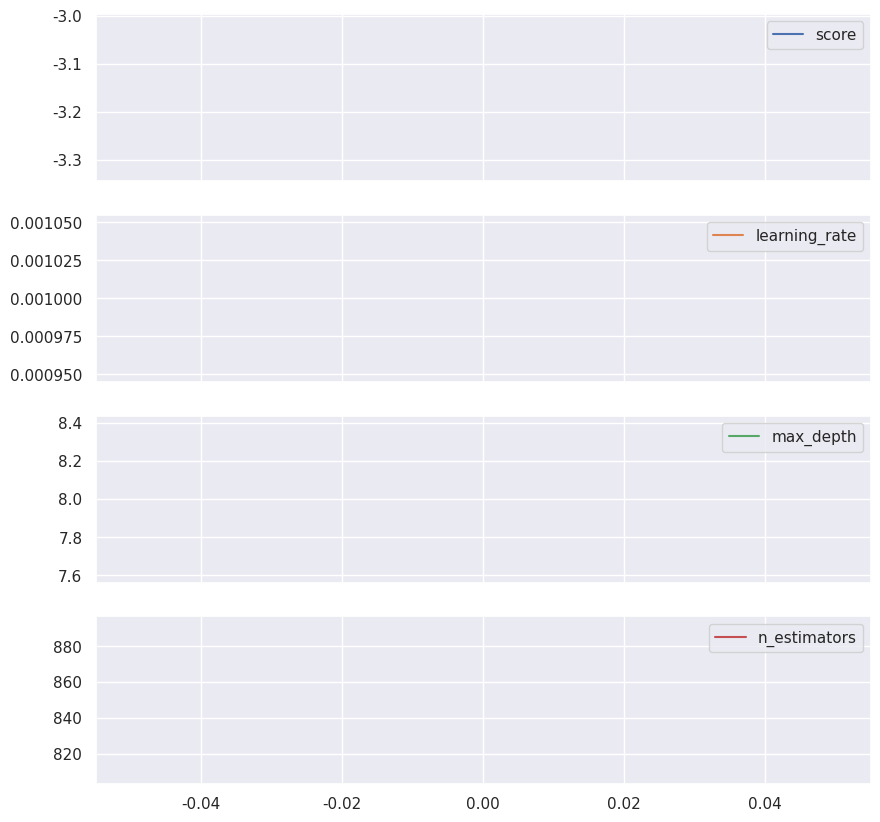

In [ ]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_learning_rate'].data,
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
# hp = {
#     "random_state" : 42
# }

# model = XGBRegressor(**hp)
# n_iter = 0
# rmse_lst = []

# for train_index, valid_index in skf.split(train_features, train_target):
#   n_iter += 1
#   # 학습용, 검증용 데이터 구성
#   train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
#   train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

#   # 학습
#   model.fit(train_x, train_y)
#   valid_pred = model.predict(valid_x) # 예측값

#   # 평가
#   rmse = mean_squared_error(valid_y, valid_pred, squared=False)
#   rmse_lst.append(rmse)
#   print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# # 최종 평가
# print('-'*50)
# print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


1 번째 Stratified K-Fold RMSE: 3.224678123931738
2 번째 Stratified K-Fold RMSE: 3.224932913483643
3 번째 Stratified K-Fold RMSE: 3.2400550213550914
4 번째 Stratified K-Fold RMSE: 3.2233640693338734
5 번째 Stratified K-Fold RMSE: 3.2863900280282197
6 번째 Stratified K-Fold RMSE: 3.290572353958114
--------------------------------------------------
교차 검증 RMSE: 3.248332085015113


In [ ]:
# best_params['random_state'] = 42
# best_params['verbose'] = 0

# best 모델 인스턴스 생성(정의)
best_mode = XGBRegressor(**hp)

In [ ]:
seed_everything(42)
n_iter = 0
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:50:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


1 번째 Stratified K-Fold RMSE: 3.224678123931738


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:50:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


2 번째 Stratified K-Fold RMSE: 3.224932913483643


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:50:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


3 번째 Stratified K-Fold RMSE: 3.2400550213550914


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:50:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


4 번째 Stratified K-Fold RMSE: 3.2233640693338734


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:50:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


5 번째 Stratified K-Fold RMSE: 3.2863900280282197


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:50:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


6 번째 Stratified K-Fold RMSE: 3.290572353958114
--------------------------------------------------
교차 검증 RMSE: 3.248332085015113


##Light GBM

LGBMClassifier Hyper Parameter

- 주요 파리미터
  - n_estimators : 모델에서 사용할 트리 갯수(학습시 생성할 트리 갯수)
  - learning_rate : 학습률
  - criterion : 분할 품질을 측정하는 기능 (default : gini)
  - max_depth : 트리의 최대 깊이
  - min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
  - min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
  - min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
  - max_features : 각 노드에서 분할에 사용할 특징의 최대 수
  - max_leaf_nodes : 리프 노드의 최대수
  - min_impurity_decrease : 최소 불순도
  - min_impurity_split : 나무 성장을 멈추기 위한 임계치
  - bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부

In [ ]:
from lightgbm import LGBMRegressor, plot_importance # 모델
from sklearn.metrics import mean_squared_error      # 평가지표 MSE

### model0

In [ ]:
seed_everything(42)
hp= {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'rmse',  # 회귀 모델의 성능 측정 메트릭 (Root Mean Squared Error)
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose' : -1
}

In [ ]:
model = LGBMRegressor(**hp)
n_iter = 0
accuracy_lst = []
rmse_lst = []
for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  tr_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  tr_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(tr_x, tr_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


1 번째 Stratified K-Fold RMSE: 3.169669388589732
2 번째 Stratified K-Fold RMSE: 3.1224849138755624
3 번째 Stratified K-Fold RMSE: 3.157991102752282
4 번째 Stratified K-Fold RMSE: 3.1284738282525915
5 번째 Stratified K-Fold RMSE: 3.197864856763529
6 번째 Stratified K-Fold RMSE: 3.170766157068614
--------------------------------------------------
교차 검증 RMSE: 3.1578750412170518


In [ ]:
model = LGBMRegressor(**hp)
n_iter=3 # 몇번 hp조합을 찾을 것인가?
scoring = 'neg_root_mean_squared_error' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(2,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(1000,2000,200, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -0.8, 20)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(model, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=3)
# 학습 (best hp 조합 찾기)
rs1.fit(train_features, train_target)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

Fitting 6 folds for each of 3 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


-3.164659170008457

In [ ]:
best_params = rs1.best_params_
best_params

{'n_estimators': 1301, 'max_depth': 7, 'learning_rate': 0.001}

In [ ]:
hp= {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'rmse',  # 회귀 모델의 성능 측정 메트릭 (Root Mean Squared Error)
    'num_leaves': 31,
    #'learning_rate': 0.05,
    'verbose' : -1,
    'n_estimators': 1301,
    'max_depth': 7,
    'learning_rate': 0.001
}
model = LGBMRegressor(**hp)
n_iter = 0
accuracy_lst = []
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  tr_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  tr_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(tr_x, tr_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


1 번째 Stratified K-Fold RMSE: 3.1769330402491116
2 번째 Stratified K-Fold RMSE: 3.1293447530856615
3 번째 Stratified K-Fold RMSE: 3.168342490247531
4 번째 Stratified K-Fold RMSE: 3.1327799102908522
5 번째 Stratified K-Fold RMSE: 3.204710607704686
6 번째 Stratified K-Fold RMSE: 3.1758442184728986
--------------------------------------------------
교차 검증 RMSE: 3.164659170008457


### model1

In [ ]:
hp = {
    "random_state" : 42,
    "verbose": -1, # 로그
}
model = LGBMRegressor(**hp)

In [ ]:
n_iter=3 # 몇번 hp조합을 찾을 것인가?
scoring = 'neg_root_mean_squared_error' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(800,1200,100, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -1, 3)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(model, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=False)
# 학습 (best hp 조합 찾기)
rs1.fit(train_x, train_y)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


-3.1614016146460866

In [ ]:
best_params = rs1.best_params_
best_params

{'n_estimators': 921, 'max_depth': 8, 'learning_rate': 0.01}

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

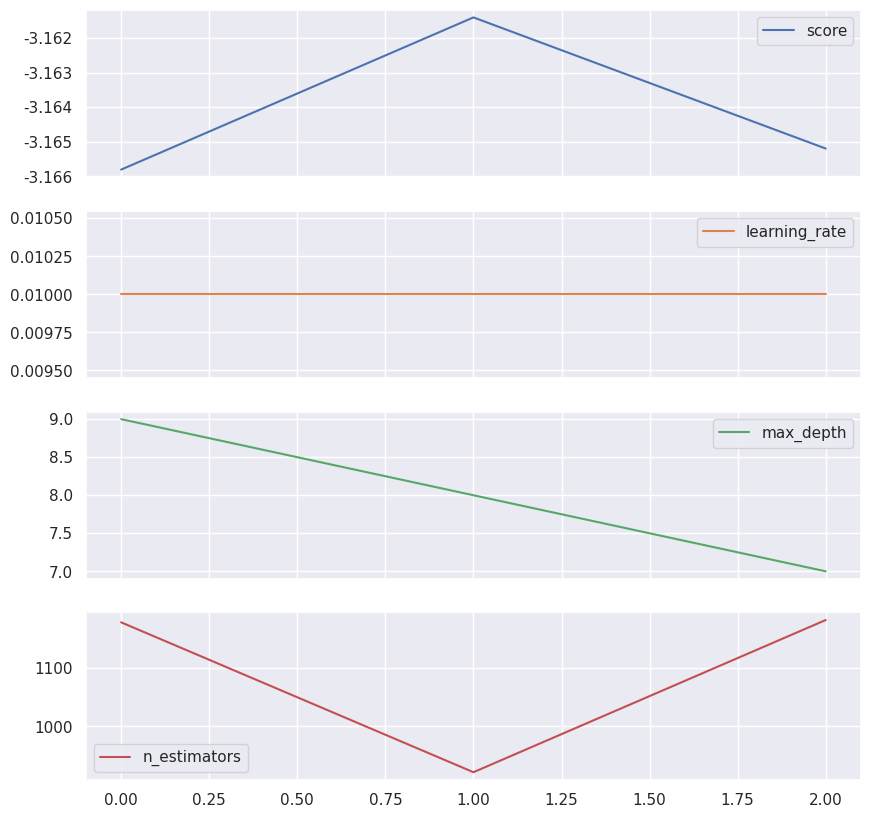

In [ ]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_learning_rate'].data,
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
best_params['random_state'] = 42
best_params['verbose'] = -1

# best 모델 인스턴스 생성(정의)
best_mode = LGBMRegressor(**best_params)

In [ ]:
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


1 번째 Stratified K-Fold RMSE: 3.1708119113494386
2 번째 Stratified K-Fold RMSE: 3.1246687240279516
3 번째 Stratified K-Fold RMSE: 3.163598885443988
4 번째 Stratified K-Fold RMSE: 3.134387742786986
5 번째 Stratified K-Fold RMSE: 3.205449029582139
6 번째 Stratified K-Fold RMSE: 3.1764365553818883
--------------------------------------------------
교차 검증 RMSE: 3.1636089890519283


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

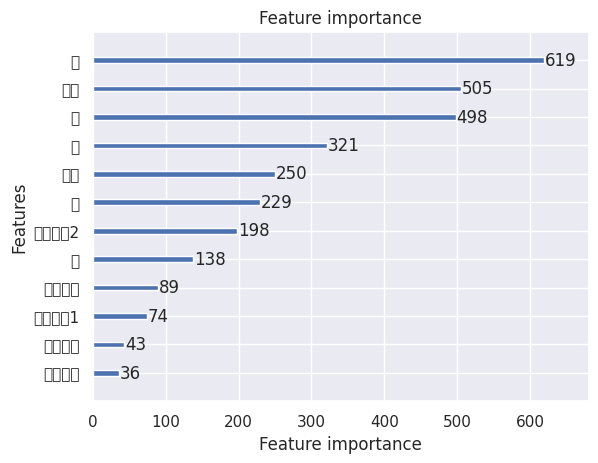

In [ ]:
plot_importance(model)
plt.show()

## RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor # 모델

### model0

In [ ]:
hp = {
    "random_state": 42,
    "verbose": 0  # 부스팅 단계 출력 안보이게 하기
}

In [ ]:
model = RandomForestRegressor(**hp)  # RandomForestRegressor로 모델 변경
n_iter = 0
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
    n_iter += 1
    # 학습용, 검증용 데이터 구성
    train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
    train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

    # 학습
    model.fit(train_x, train_y)
    valid_pred = model.predict(valid_x)  # 예측값

    # 평가
    rmse = mean_squared_error(valid_y, valid_pred, squared=False)
    rmse_lst.append(rmse)
    print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-' * 50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


1 번째 Stratified K-Fold RMSE: 3.2909646818408547
2 번째 Stratified K-Fold RMSE: 3.249468547198853
3 번째 Stratified K-Fold RMSE: 3.2727318325949035
4 번째 Stratified K-Fold RMSE: 3.2628380384545075
5 번째 Stratified K-Fold RMSE: 3.3267733184671435
6 번째 Stratified K-Fold RMSE: 3.2962981956641353
--------------------------------------------------
교차 검증 RMSE: 3.2831791023700667


### model1

In [ ]:
hp = {
    "random_state" : 42,
    "verbose": 0, # 로그
}
model = RandomForestRegressor(**hp)

In [ ]:
n_iter=5 # 몇번 hp조합을 찾을 것인가?
scoring = 'neg_root_mean_squared_error' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(100,500,100, dtype = int), # 부스팅 단계수
}

# HPO 인스턴스 생성
rs1 = RandomizedSearchCV(RandomForestRegressor(), hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=3)
# 학습 (best hp 조합 찾기)
rs1.fit(train_x, train_y)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

Fitting 6 folds for each of 5 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


-3.160126530232027

In [ ]:
best_params = rs1.best_params_
best_params

{'n_estimators': 184, 'max_depth': 6}

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

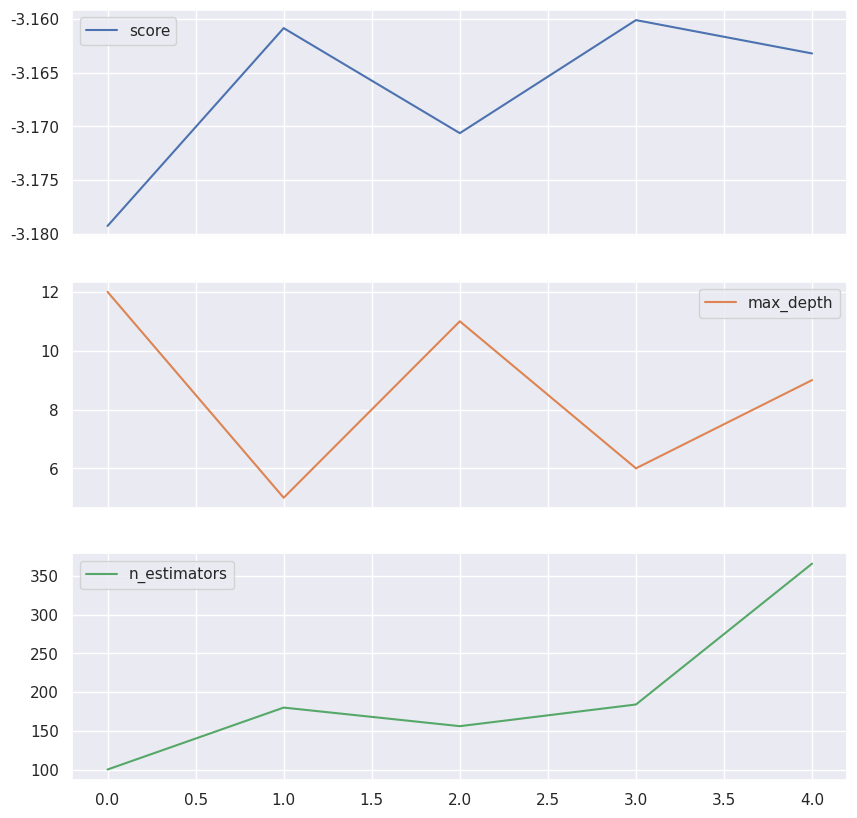

In [ ]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
best_params['random_state'] = 42
best_params['verbose'] = 0

# best 모델 인스턴스 생성(정의)
best_model = RandomForestRegressor(**best_params)

In [ ]:
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  model.fit(train_x, train_y)
  valid_pred = model.predict(valid_x) # 예측값

  # 평가
  rmse = mean_squared_error(valid_y, valid_pred, squared=False)
  rmse_lst.append(rmse)
  print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


1 번째 Stratified K-Fold RMSE: 3.2909646818408547
2 번째 Stratified K-Fold RMSE: 3.249468547198853
3 번째 Stratified K-Fold RMSE: 3.2727318325949035
4 번째 Stratified K-Fold RMSE: 3.2628380384545075
5 번째 Stratified K-Fold RMSE: 3.3267733184671435
6 번째 Stratified K-Fold RMSE: 3.2962981956641353
--------------------------------------------------
교차 검증 RMSE: 3.2831791023700667


## Voting

In [31]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [32]:
from xgboost import XGBRegressor                 # 부스팅 모델

In [33]:
from lightgbm import LGBMRegressor, plot_importance # 모델

In [34]:
from catboost import CatBoostRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor # 모델

In [36]:
seed_everything(42)
xgb_hp = {
    "random_state" : 42,
    "verbose": 0, # 로그
    "max_depth" : 8, # 깊이
    "n_estimators" : 850, # 부스팅 단계수
    "learning_rate" : 0.001
}
xgb = XGBRegressor(**xgb_hp)

In [37]:
seed_everything(42)
light_hp= {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'rmse',  # 회귀 모델의 성능 측정 메트릭 (Root Mean Squared Error)
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose' : -1
}
light = LGBMRegressor(**light_hp)

In [38]:
seed_everything(42)
cat_hp = {
    "random_state" : 42,
    "verbose": 0, # 로그
    'n_estimators': 253,
    'max_depth': 5,
    'learning_rate': 0.1
}
cat = CatBoostRegressor(**cat_hp)

In [39]:
seed_everything(42)
randforest_hp = {
    "random_state": 42,
    "verbose": 0  # 부스팅 단계 출력 안보이게 하기
}
randforest = RandomForestRegressor(**randforest_hp)  # RandomForestRegressor로 모델 변경

In [40]:
from sklearn.ensemble import VotingRegressor

In [41]:
seed_everything(42)
vote_model = VotingRegressor(
    estimators =[("xgb",xgb),
                 ("light", light),
                 ("cat", cat),
                 ("randforest", randforest)]
)

In [43]:
vote_model.fit(train_features, train_target)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:46:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=850,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('light',
                             LGBMRegressor(learning_rate=0.05, metric='rmse',
                                           objective='regression',
                                           verbose=-1)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x7802092be5f0>),
                            ('randforest',
                             RandomForestRegressor(random_state=42))])

## train_y, pred RMSE

In [44]:
vote_model

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=850,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('light',
                             LGBMRegressor(learning_rate=0.05, metric='rmse',
                                           objective='regression',
                                           verbose=-1)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x7802092be5f0>),
                            ('randforest',
                             RandomForestRegressor(random_state=42))])

In [46]:
pred = vote_model.predict(train_features)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(train_target, pred))
print(f'RMSE: {rmse}')

RMSE: 2.6098484865594274


In [47]:
pred_df = pd.DataFrame(pred, columns=['ECLO'])

# 평가

## 산포도

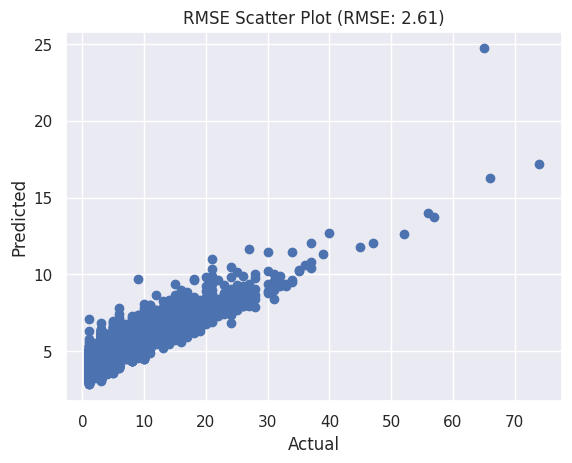

In [49]:
import matplotlib.pyplot as plt

# train_y와 pred의 RMSE를 계산
rmse = np.sqrt(mean_squared_error(train_target, pred))

# 산포도 그래프 생성
plt.scatter(train_target, pred)

# 그래프에 제목과 x축, y축 레이블 추가
plt.title(f'RMSE Scatter Plot (RMSE: {rmse:.2f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# 그래프 표시
plt.show()

# 제출

In [50]:
prediction =  vote_model.predict(test_features)

In [51]:
# Data를 불러와 DataFrame화
sample_submission = pd.read_csv(args.default_submission_path)

In [52]:
baseline_submission = sample_submission.copy()
baseline_submission['ECLO'] = prediction
baseline_submission

,ID,ECLO
0,ACCIDENT_39609,4.543349
1,ACCIDENT_39610,4.181695
2,ACCIDENT_39611,6.543506
3,ACCIDENT_39612,5.734429
4,ACCIDENT_39613,5.273716
...,...,...
10958,ACCIDENT_50567,5.787146
10959,ACCIDENT_50568,4.766151
10960,ACCIDENT_50569,5.151864
10961,ACCIDENT_50570,5.308807


In [ ]:
from datetime import datetime, timedelta

In [ ]:
now = datetime.now() + timedelta(hours=9)
formatted_time = now.strftime("%Y%m%d_%H%M")
formatted_time

'20231202_1719'

In [ ]:
save_path = args.result_path + formatted_time + '.csv'
baseline_submission.to_csv(save_path, index=False)